In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('dataset/train', download=True, train=True, transform=transform)
valset = datasets.MNIST('dataset/test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


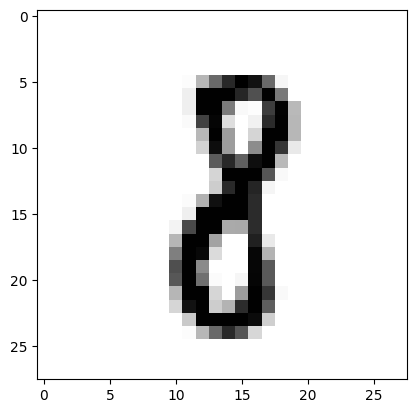

In [5]:
plt.imshow(images[45].numpy().squeeze(), cmap='gray_r');

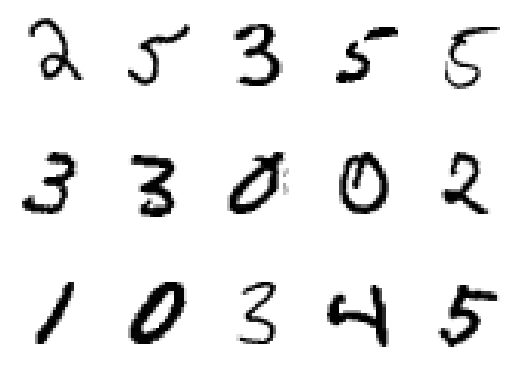

In [6]:
figure = plt.figure()
num_of_images = 15
for index in range(1, num_of_images + 1):
    plt.subplot(3, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
input_size = 784
hidden_sizes = [512, 256]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [9]:
images.shape

torch.Size([64, 784])

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016]])


2023-09-25 16:30:26.390 Python[6391:181556] apply_selection_policy_once: avoid use of removable GPUs (via org.python.python:GPUSelectionPolicy->avoidRemovable)


In [ ]:
training_loss = []
validation_accuracy = []

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        epoch_loss = running_loss / len(trainloader)
        training_loss.append(epoch_loss)
print("\nTraining Time (in minutes) =",(time()-time0)/60)

In [ ]:
# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_loss, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
     

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [11]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
    

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9758


## Code for question (c)

2023-09-25 16:33:44.609 Python[6489:186430] apply_selection_policy_once: avoid use of removable GPUs (via org.python.python:GPUSelectionPolicy->avoidRemovable)


Epoch 0 - Training loss: 0.593237796000072 - Validation loss: 0.30188314218050355
Epoch 1 - Training loss: 0.2682839208510893 - Validation loss: 0.22578119144887682
Epoch 2 - Training loss: 0.20141686527316632 - Validation loss: 0.18199618687485433
Epoch 3 - Training loss: 0.15931141874723154 - Validation loss: 0.14313616492091472
Epoch 4 - Training loss: 0.12965013779628315 - Validation loss: 0.1326391415041723
Epoch 5 - Training loss: 0.1093552576443518 - Validation loss: 0.1131610331380633
Epoch 6 - Training loss: 0.09448144358517264 - Validation loss: 0.09899419383590768
Epoch 7 - Training loss: 0.0819925853236914 - Validation loss: 0.09267775292039677
Epoch 8 - Training loss: 0.07202244047343588 - Validation loss: 0.08647603151287622
Epoch 9 - Training loss: 0.06412591774469373 - Validation loss: 0.09429315170925703
Epoch 10 - Training loss: 0.05791043893628712 - Validation loss: 0.08515049687106234
Epoch 11 - Training loss: 0.0515922356986685 - Validation loss: 0.0772441436868801

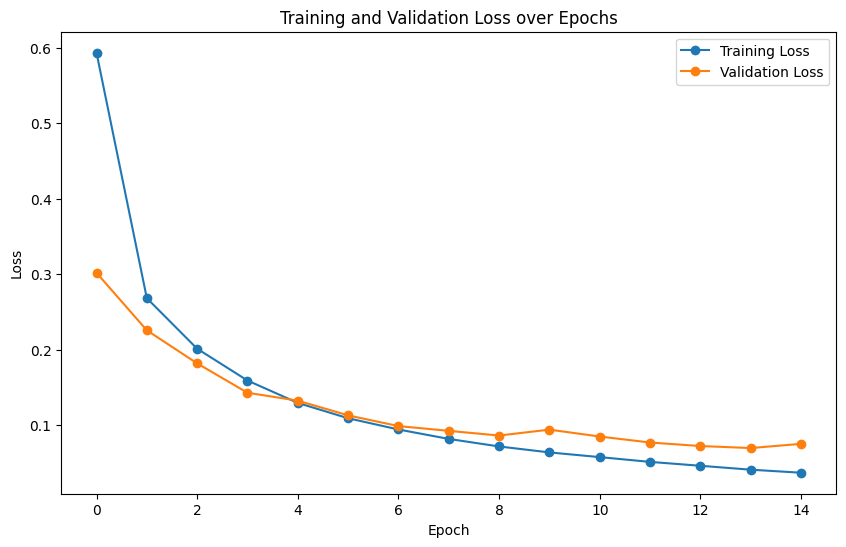

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
# Initialize lists to store the training and validation losses
training_losses = []
validation_losses = []

# Set the number of epochs for training
epochs = 15

# Start the training loop
for e in range(epochs):
    running_loss = 0
    # Training Loop
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass: compute predictions by passing inputs through the model
        output = model(images)
        
        # Compute the loss between the model output and the true labels
        loss = criterion(output, labels)
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        
        # Perform a single optimization step (parameter update)
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item()
        
    # Calculate the training loss for the current epoch
    training_loss = running_loss / len(trainloader)
    training_losses.append(training_loss)
    
    # Validation Loop
    validation_loss = 0
    with torch.no_grad():
        for images, labels in valloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
            
            # Forward pass: compute predictions by passing inputs through the model
            output = model(images)
            
            # Compute the loss between the model output and the true labels
            loss = criterion(output, labels)
            
            # Update the running validation loss
            validation_loss += loss.item()
    
    # Calculate the validation loss for the current epoch
    validation_loss = validation_loss / len(valloader)
    validation_losses.append(validation_loss)
    
    # Print the training and validation losses for the current epoch
    print(f"Epoch {e} - Training loss: {training_loss} - Validation loss: {validation_loss}")

# Plot the training and validation losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_losses, marker='o', label='Training Loss')
plt.plot(range(epochs), validation_losses, marker='o', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Code for question (d)

In [ ]:
# Define the number of input and output neurons
input_size = 784
output_size = 10

# Define different numbers of neurons for the hidden layers
hidden_layer_configurations = [
    [128, 64],
    [256, 128],
    [512, 256],
    [1024, 512],
    [2048, 1024],
    [4096, 2048],
    [8192, 4096],
    
]

# Initialize lists to store the training and validation losses for each configuration
all_training_losses = []
all_validation_losses = []

# Initialize a list to store the final accuracy for each configuration
final_accuracies = []

# Set the number of epochs for training
epochs = 15

# Iterate over different hidden layer configurations
for hidden_sizes in hidden_layer_configurations:
    # Define the model architecture using a Sequential container
    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),
                          nn.LogSoftmax(dim=1))
    
    # Define the loss function and optimizer
    criterion = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    
    # Initialize lists to store the training and validation losses for the current configuration
    training_losses = []
    validation_losses = []
    
    # Start the training loop
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
        
        # Zero the parameter gradients
            optimizer.zero_grad()
        
        # Forward pass: compute predictions by passing inputs through the model
            output = model(images)
        
        # Compute the loss between the model output and the true labels
            loss = criterion(output, labels)
            
        # Backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        
        # Perform a single optimization step (parameter update)
            optimizer.step()
        
        # Update the running loss
            running_loss += loss.item()
        
    # Calculate the training loss for the current epoch
        training_loss = running_loss / len(trainloader)
        training_losses.append(training_loss)
        
        # Validation Loop
        validation_loss = 0
        with torch.no_grad():
            for images, labels in valloader:
            # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
            
            # Forward pass: compute predictions by passing inputs through the model
                output = model(images)
            
            # Compute the loss between the model output and the true labels
                loss = criterion(output, labels)
            
            # Update the running validation loss
                validation_loss += loss.item()
    
    # Calculate the validation loss for the current epoch
        validation_loss = validation_loss / len(valloader)
        validation_losses.append(validation_loss)
    
    # Append the training and validation losses for the current configuration
    all_training_losses.append(training_losses)
    all_validation_losses.append(validation_losses)
    
    # Calculate the final accuracy on the validation set for the current configuration
    correct_count, all_count = 0, 0
    for images, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                correct_count += 1
            all_count += 1
    final_accuracy = correct_count / all_count
    final_accuracies.append(final_accuracy)

# Plot the training and validation losses for each configuration
plt.figure(figsize=(12, 6))
for i, hidden_sizes in enumerate(hidden_layer_configurations):
    plt.plot(range(epochs), all_training_losses[i], label=f'Training Loss - {hidden_sizes}')
    plt.plot(range(epochs), all_validation_losses[i], label=f'Validation Loss - {hidden_sizes}', linestyle='dashed')
plt.title('Training and Validation Loss over Epochs for Different Hidden Layer Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the final accuracy for each configuration
for i, hidden_sizes in enumerate(hidden_layer_configurations):
    print(f"Final Accuracy for {hidden_sizes} hidden neurons: {final_accuracies[i]}")


2023-09-25 16:44:03.897 Python[6557:189607] apply_selection_policy_once: avoid use of removable GPUs (via org.python.python:GPUSelectionPolicy->avoidRemovable)
